<a href="https://colab.research.google.com/github/NomanHasanNM/Demo_Data_Loan/blob/main/Demo_Data_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving Data_Loan.csv to Data_Loan.csv


{'Data_Loan.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved\r\nLP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban,0\r\nLP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban,0\r\nLP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban,0\r\nLP001035,Male,Yes,2,Graduate,No,2340,2546,100,360,,Urban,0\r\nLP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban,0\r\nLP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152,360,1,Urban,0\r\nLP001055,Female,No,1,Not Graduate,No,2226,0,59,360,1,Semiurban,0\r\nLP001056,Male,Yes,2,Not Graduate,No,3881,0,147,360,0,Rural,0\r\nLP001059,Male,Yes,2,Graduate,,13633,0,280,240,1,Urban,0\r\nLP001067,Male,No,0,Not Graduate,No,2400,2400,123,360,1,Semiurban,0\r\nLP001078,Male,No,0,Not Graduate,No,3091,0,90,360,1,Urban,0\r\nLP001082,Male,Yes,1,Graduate,,2185,1516,162,360,1,Semiurban,0\r\nLP001083,Male,No,3+,Graduate,No,4166,0,40,180,,U

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV




In [4]:
df = pd.read_csv('Data_Loan.csv')


In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,0
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,0
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,0
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,0


In [5]:
!head 'Data_Loan.csv'

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
LP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban,0
LP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban,0
LP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban,0
LP001035,Male,Yes,2,Graduate,No,2340,2546,100,360,,Urban,0
LP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban,0
LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152,360,1,Urban,0
LP001055,Female,No,1,Not Graduate,No,2226,0,59,360,1,Semiurban,0
LP001056,Male,Yes,2,Not Graduate,No,3881,0,147,360,0,Rural,0
LP001059,Male,Yes,2,Graduate,,13633,0,280,240,1,Urban,0


In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0


In [7]:
%%time
data = pd.read_csv('Data_Loan.csv')
submission = pd.read_csv('Data_Loan.csv')

CPU times: user 10.4 ms, sys: 1.86 ms, total: 12.2 ms
Wall time: 12.9 ms


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan Approved      367 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 37.4+ KB


AttributeError: ignored

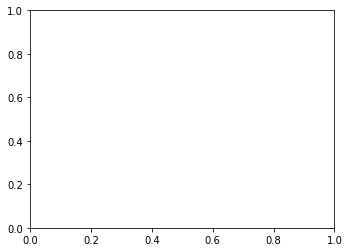

In [9]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.barplot(data.Loan_Status.value_counts(),y=['Approved (1)','Rejected (0)'])
plt.subplot(122)
data.Loan_Status.value_counts(normalize=True).plot.pie(autopct="%.2f%%")
plt.show()

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan Approved
count,367.000000,367.000000,362.000000,361.000000,338.000000,367.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444,0.070845
std,4910.685399,2334.232099,61.366652,65.156643,0.380150,0.256915
min,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000,0.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000,0.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000,1.000000


In [11]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan Approved
ApplicantIncome,1.000000,-0.110335,0.493451,0.023249,0.099553,-0.021545
CoapplicantIncome,-0.110335,1.000000,0.150850,-0.010984,-0.071235,-0.029227
LoanAmount,0.493451,0.150850,1.000000,0.094950,-0.012578,0.031348
Loan_Amount_Term,0.023249,-0.010984,0.094950,1.000000,-0.053593,0.001651
Credit_History,0.099553,-0.071235,-0.012578,-0.053593,1.000000,-0.024601
Loan Approved,-0.021545,-0.029227,0.031348,0.001651,-0.024601,1.000000


In [13]:

data.drop(columns=['Loan_ID'],inplace=True)


In [15]:
rfc = RandomForestClassifier(random_state=5,class_weight="balanced").fit(X_train,y_train)

classification_metrics(y_test,rfc.predict(X_test))
pd.DataFrame(rfc.feature_importances_,index=X_test.columns,columns=['importance']).sort_values(by='importance').plot.barh()
plt.show()

NameError: ignored

In [12]:
df = DecisionTreeClassifier(random_state=5)
tree = df.fit(X_s,y_s)

classification_metrics(y_test,tree.predict(X_test))

NameError: ignored

In [19]:
X_train1,X_test1 = X_train[::],X_test[::]

X_train1['Total Income'] = X_train['ApplicantIncome'] + X_train['CoapplicantIncome']
# X_train1['Credibility'] = X_train['LoanAmount'] / X_train1['Total Income']
X_test1['Total Income'] = X_test['ApplicantIncome'] + X_test['CoapplicantIncome']
# X_test1['Credibility'] = X_test['LoanAmount'] / X_test1['Total Income']

X_train1.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)
X_test1.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

#random forest with new feature
rfc = RandomForestClassifier(random_state=5).fit(X_train1,y_train)

classification_metrics(y_test,rfc.predict(X_test1))

pd.DataFrame(rfc.feature_importances_,index=X_test1.columns,columns=['importance']).sort_values(by='importance').plot.barh()
plt.show()

NameError: ignored

In [18]:
def objective(space):
    
    rfc = RandomForestClassifier(
        random_state=5,
        class_weight="balanced",
        max_depth = space['max_depth']
    ).fit(X_train,y_train)

    f1 = f1_score(y_test,rfc.predict(X_test))
    
    # return needs to be in this below format. 
    # We use negative of accuracy since we want to maximize it.
    return {'loss': -f1, 'status': STATUS_OK }
# Using single parameter to show its use
space = {
    'max_depth': hp.quniform("x_max_depth", 4, 16, 1),
    }

NameError: ignored

In [22]:
rfc = RandomForestClassifier(
    random_state=5,
    class_weight="balanced",
    max_depth = 9
).fit(X_train,y_train)

prediction = rfc.predict(X_test)

NameError: ignored

In [ ]:
submission.drop(columns = ['Unnamed: 0','Loan_ID'], inplace=True)
predictions = rfc.predict(submission)

In [ ]:
submission['predictions'] = predictions

In [20]:
submission[["predictions"]].sample(10).style.background_gradient(cmap='Accent_r')

KeyError: ignored